# Autoencoders

La arquitectura de una red neuronal llamada Autoencoder consiste en una capa de entrada que contiene N neuronas, una capa intermedia que contiene M neuronas y una capa de salida que tiene N neuronas al igual que la entrada y ademas tiene las siguientes propiedades:
1. M es menor que N
2. El valor esperado de la capa de salida es igual al valor de la capa de entrada, es decir debe salir el mismo valor que ingreso

Veamos un ejemplo:

La siguiente red tiene 10 entradas que dan la altura de la sombra de un animal que puede ser una iguana, un caballo o una jirafa

In [221]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net_rectangular(ax, layer_sizes, weights, neuron_values):
    left, right, bottom, top, = .1, .9, .1, .9
    '''
    Draw a neural network cartoon using matplotlib with weighted connections and neuron activation levels,
    where the neurons are represented as rectangles (with width based on the previously used circle diameter)
    filled from bottom to top based on their values.

    :param ax: matplotlib axis to draw on
    :param left: x-coordinate of the left side of the drawing
    :param right: x-coordinate of the right side of the drawing
    :param bottom: y-coordinate of the bottom of the drawing
    :param top: y-coordinate of the top of the drawing
    :param layer_sizes: list containing the number of neurons in each layer
    :param weights: list of arrays containing the weights for each layer
    :param neuron_values: list of arrays containing the values for each neuron in each layer
    '''
    
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Calculate global min and max values across all layers for scaling
    min_val = min([val.min() for val in neuron_values])
    max_val = max([val.max() for val in neuron_values])
    val_range = max_val - min_val

    # Nodes as rectangles with width equal to the diameter of the previously used circles
    rect_width = v_spacing / 4. * 2  # Diameter of the previously used circles
    rect_height = v_spacing/2.

    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            value = neuron_values[n][m]
            normalized_val = (value - min_val) / val_range
            rect_center = (n*h_spacing + left, layer_top - m*v_spacing)
            rect = plt.Rectangle((rect_center[0] - rect_width/2, rect_center[1] - rect_height/2), rect_width, rect_height, 
                                 color='k', fill=False, ec='k', zorder=4)
            ax.add_artist(rect)
            # Fill level of the rectangle from bottom to top
            fill_extent = rect_height * normalized_val
            fill_rect = plt.Rectangle((rect_center[0] - rect_width/2, rect_center[1] - rect_height/2), rect_width, fill_extent, 
                                      color='k', zorder=5)
            ax.add_artist(fill_rect)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                weight = weights[n][o, m]
                color = 'green' if weight > 0 else 'red'
                line = plt.Line2D([n*h_spacing + left + rect_width/2, (n + 1)*h_spacing + left - rect_width/2],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c=color)
                ax.add_artist(line)
                
    print()
    return ax.get_children()

In [233]:
# Create a dummy MLPClassifier model and fit it
#X = np.random.rand(100, 10)  # 10 input features
#X = np.random.randint(0,2, size=(3,10))  # 10 input features
#X = np.sort(X)

X = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

y = X  # input is the same as output
y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [247]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(3,), max_iter=10000)
model.fit(X, y)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=10000)

In [248]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
sigmoid_v = np.vectorize(sigmoid)

# Extract weights and generate dummy neuron values for the visualization
inputs = X[2]
activations = sigmoid_v(np.matmul(inputs, model.coefs_[0]) + model.intercepts_[0])
weights = [coefs.T for coefs in model.coefs_]
prediction = model.predict(inputs.reshape(1, -1))
neuron_values = [inputs, activations, prediction.flatten()]

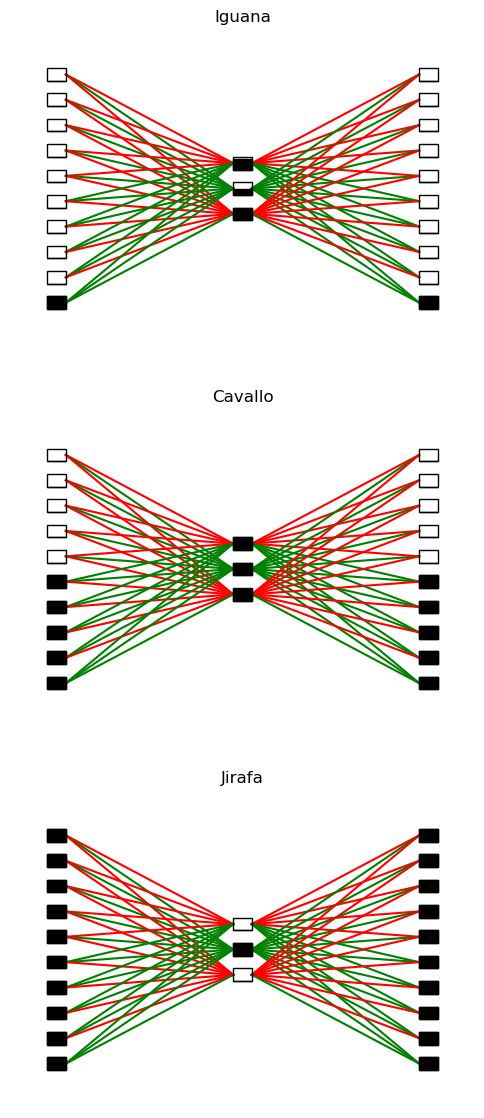

In [253]:
# Draw the neural network
fig, ax = plt.subplots(3, 1, figsize=(6, 14))

# Extract weights and generate dummy neuron values for the visualization
ax[0].axis('off')
ax[0].set_title("Iguana")
inputs = X[0]
activations = sigmoid_v(np.matmul(inputs, model.coefs_[0]) + model.intercepts_[0])
weights = [coefs.T for coefs in model.coefs_]
prediction = model.predict(inputs.reshape(1, -1))
neuron_values = [inputs, activations, prediction.flatten()]
draw_neural_net_rectangular(ax[0], [10,3,10], weights, neuron_values)

# Extract weights and generate dummy neuron values for the visualization
ax[1].axis('off')
ax[1].set_title("Caballo")
inputs = X[1]
activations = sigmoid_v(np.matmul(inputs, model.coefs_[0]) + model.intercepts_[0])
weights = [coefs.T for coefs in model.coefs_]
prediction = model.predict(inputs.reshape(1, -1))
neuron_values = [inputs, activations, prediction.flatten()]
draw_neural_net_rectangular(ax[1], [10,3,10], weights, neuron_values)

# Extract weights and generate dummy neuron values for the visualization
ax[2].axis('off')
ax[2].set_title("Jirafa")
inputs = X[2]
activations = sigmoid_v(np.matmul(inputs, model.coefs_[0]) + model.intercepts_[0])
weights = [coefs.T for coefs in model.coefs_]
prediction = model.predict(inputs.reshape(1, -1))
neuron_values = [inputs, activations, prediction.flatten()]
draw_neural_net_rectangular(ax[2], [10,3,10], weights, neuron_values)
plt.show()

## Usando pytorch para mostrar una animacion

In [225]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 3)  # 10 input neurons, 3 neurons in hidden layer
        self.fc2 = nn.Linear(3, 10)  # 10 output neurons

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
net = SimpleNN()

# Create dummy data
#X_torch = torch.rand(100, 10)
X_torch = torch.randint(0, 2, (100,10)).to(torch.float)
X_torch, _ = torch.sort(X_torch)
y_torch = torch.randint(0, 10, (100,))
y_torch = X_torch

In [226]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Training the network and capturing weights and activations at each iteration
EPOCHS = 20
weights_and_activations = []
for epoch in range(EPOCHS):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(len(X_torch)):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = X_torch[i], y_torch[i]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs.unsqueeze(0), labels.unsqueeze(0))

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Capture weights and activations
        with torch.no_grad():
            hidden_activations = torch.relu(net.fc1(inputs))
            output_activations = net.fc2(hidden_activations)
            weights_and_activations.append({
                'epoch': epoch,
                'weights_1': net.fc1.weight.data.numpy(),
                'weights_2': net.fc2.weight.data.numpy(),
                'inputs': inputs,
                'activations': hidden_activations.numpy(),
                'output_activations': output_activations.numpy()
            })

print("Entrenamiento terminado")
# The weights_and_activations list now contains the data for each training iteration
# Next step would be to create the animation based on this data

Entrenamiento terminado


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## TODO: update artists instead of adding them so animation works correctly

def draw_neural_net_rectangular(ax, layer_sizes, weights, neuron_values):
    left, right, bottom, top, = .1, .9, .1, .9
    '''
    Draw a neural network cartoon using matplotlib with weighted connections and neuron activation levels,
    where the neurons are represented as rectangles (with width based on the previously used circle diameter)
    filled from bottom to top based on their values.

    :param ax: matplotlib axis to draw on
    :param left: x-coordinate of the left side of the drawing
    :param right: x-coordinate of the right side of the drawing
    :param bottom: y-coordinate of the bottom of the drawing
    :param top: y-coordinate of the top of the drawing
    :param layer_sizes: list containing the number of neurons in each layer
    :param weights: list of arrays containing the weights for each layer
    :param neuron_values: list of arrays containing the values for each neuron in each layer
    '''
    
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Calculate global min and max values across all layers for scaling
    min_val = min([val.min() for val in neuron_values])
    max_val = max([val.max() for val in neuron_values])
    val_range = max_val - min_val

    # Nodes as rectangles with width equal to the diameter of the previously used circles
    rect_width = v_spacing / 4. * 2  # Diameter of the previously used circles
    rect_height = v_spacing/2.

    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            value = neuron_values[n][m]
            normalized_val = (value - min_val) / val_range
            rect_center = (n*h_spacing + left, layer_top - m*v_spacing)
            rect = plt.Rectangle((rect_center[0] - rect_width/2, rect_center[1] - rect_height/2), rect_width, rect_height, 
                                 color='k', fill=False, ec='k', zorder=4)
            ax.add_artist(rect)
            # Fill level of the rectangle from bottom to top
            fill_extent = rect_height * normalized_val
            fill_rect = plt.Rectangle((rect_center[0] - rect_width/2, rect_center[1] - rect_height/2), rect_width, fill_extent, 
                                      color='k', zorder=5)
            ax.add_artist(fill_rect)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                weight = weights[n][o, m]
                color = 'green' if weight > 0 else 'red'
                line = plt.Line2D([n*h_spacing + left + rect_width/2, (n + 1)*h_spacing + left - rect_width/2],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c=color)
                ax.add_artist(line)
                
    print()
    return ax.get_children()

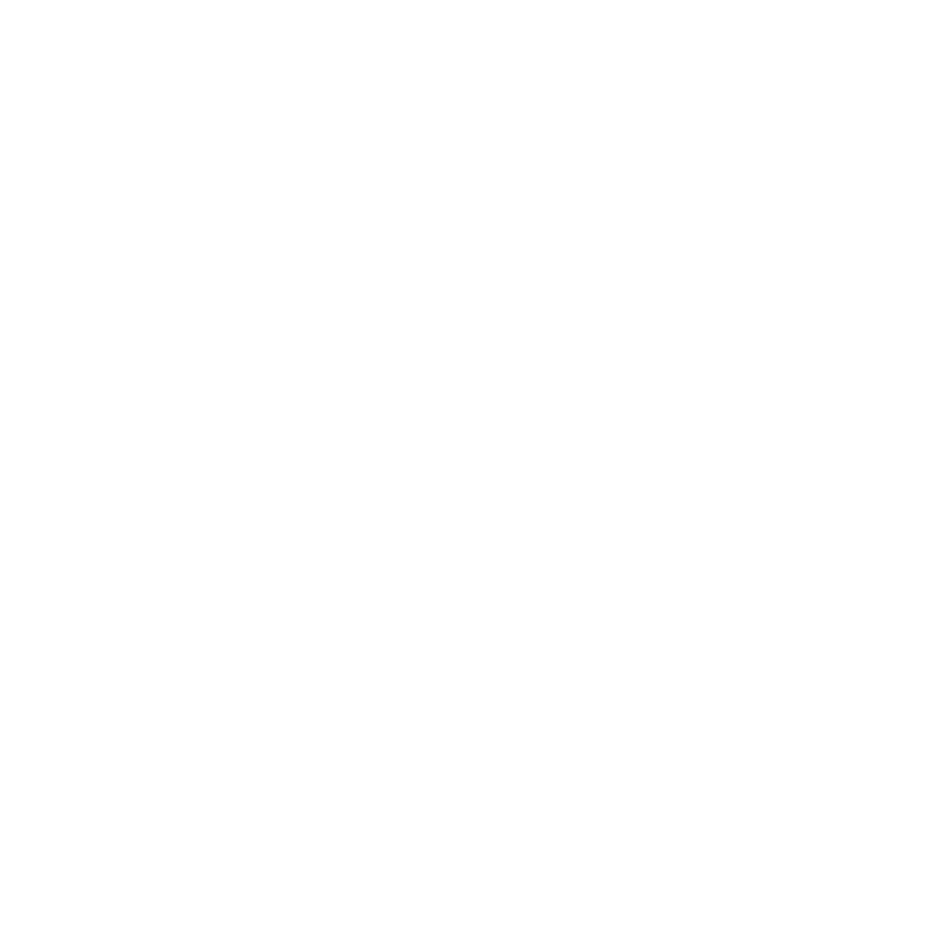

In [227]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig, ax = plt.subplots(figsize=(12, 12))
artists = []
for frame in range(EPOCHS):
    current_data = weights_and_activations[frame]
    weights = [current_data['weights_1'], current_data['weights_2']]
    neuron_values = [current_data['inputs'],current_data['activations'], current_data['output_activations']]
    # Draw the network for the current frame
    tmp_artists = draw_neural_net_rectangular(ax, [10, 3, 10], weights, neuron_values)
    artists.append(tmp_artists)

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=50)

from IPython.display import HTML
HTML(ani.to_jshtml())

# Referencias:

- [sklearn MLP](https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.neural_network.MLPClassifier.html)

- [Visualizacion](https://github.com/jzliu-100/visualize-neural-network/tree/master)

- [Explicacion de Patrick Winston](https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/resources/lecture-12b-deep-neural-nets/)

- [Minuto donde comienza la explicacion de Winston](https://youtu.be/VrMHA3yX_QI?si=aP3gAVDLsh7ak2qX&t=949)

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/deeplearning/deeplearning.html)